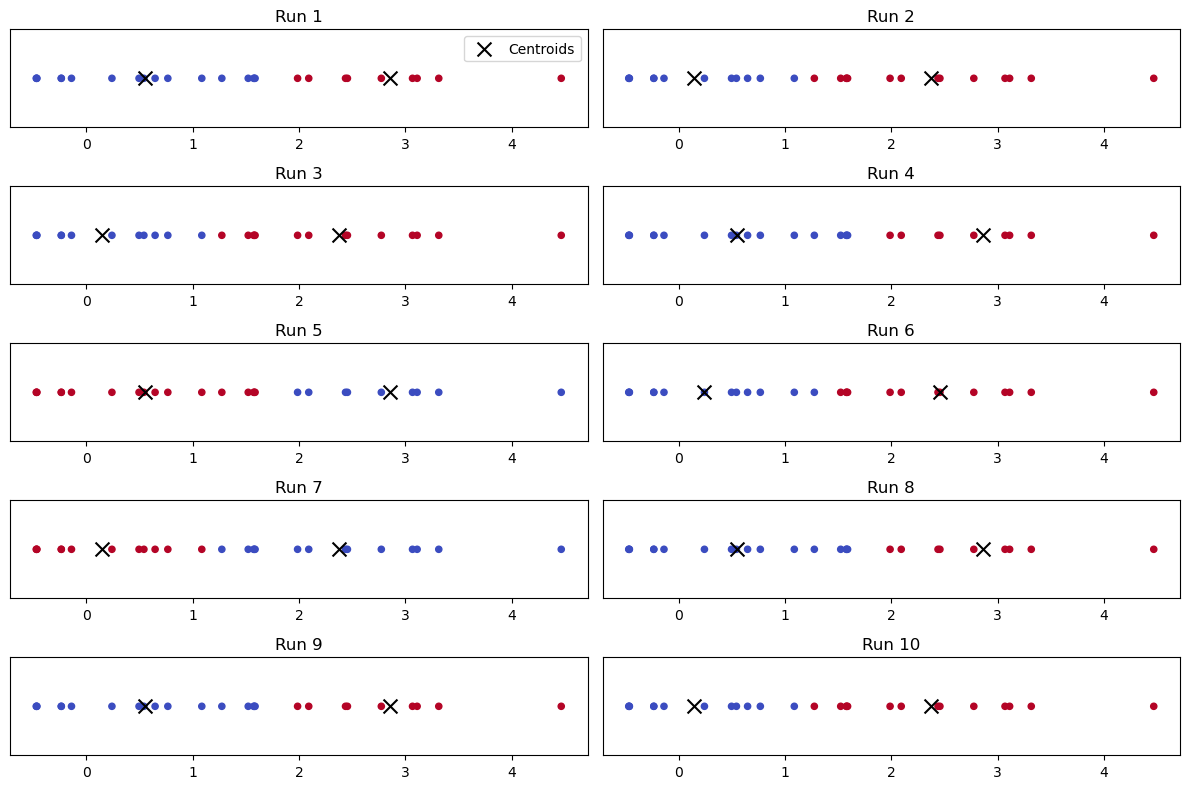

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

np.random.seed(42)
data1 = np.random.normal(loc=0, scale=1, size=13)
data2 = np.random.normal(loc=3, scale=1, size=13)
X = np.concatenate([data1, data2]).reshape(-1, 1)

plt.figure(figsize=(12, 8))
for i in range(10):
    kmeans = KMeans(n_clusters=2, n_init=1, init='random', random_state=i)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_.flatten()
    labels = kmeans.labels_
    plt.subplot(5, 2, i+1)
    plt.scatter(X, np.zeros_like(X), c=labels, cmap='coolwarm', s=20)
    plt.scatter(centroids, [0, 0], c='black', marker='x', s=100, label='Centroids')
    plt.title(f'Run {i+1}')
    plt.yticks([])
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.show()

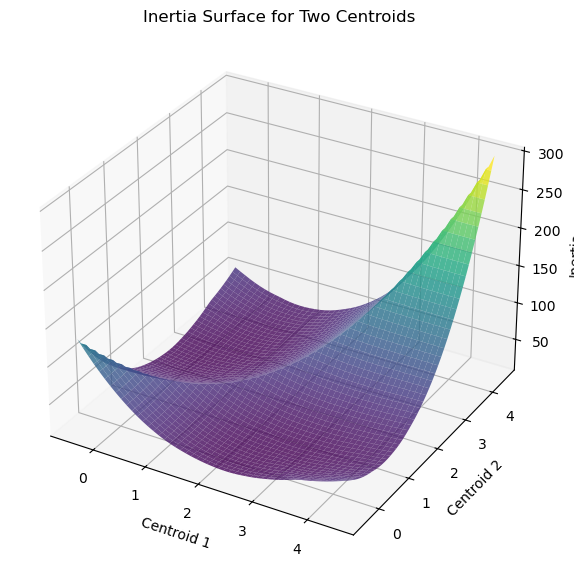

In [ ]:
x_min, x_max = X.min(), X.max()
y_min, y_max = X.min(), X.max()

grid_points = 50
centroid1_range = np.linspace(x_min, x_max, grid_points)
centroid2_range = np.linspace(y_min, y_max, grid_points)
C1, C2 = np.meshgrid(centroid1_range, centroid2_range)
inertia_vals = np.zeros_like(C1)

for i in range(grid_points):
    for j in range(grid_points):
        centers = np.array([[C1[i, j]], [C2[i, j]]])
        labels_grid = np.argmin(np.abs(X - centers.T), axis=1)
        inertia = np.sum((X.flatten() - centers[labels_grid].flatten())**2)
        inertia_vals[i, j] = inertia

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(C1, C2, inertia_vals, cmap='viridis', alpha=0.8)
ax.set_xlabel('Centroid 1')
ax.set_ylabel('Centroid 2')
ax.set_zlabel('Inertia')
ax.set_title('Inertia Surface for Two Centroids')
plt.show()

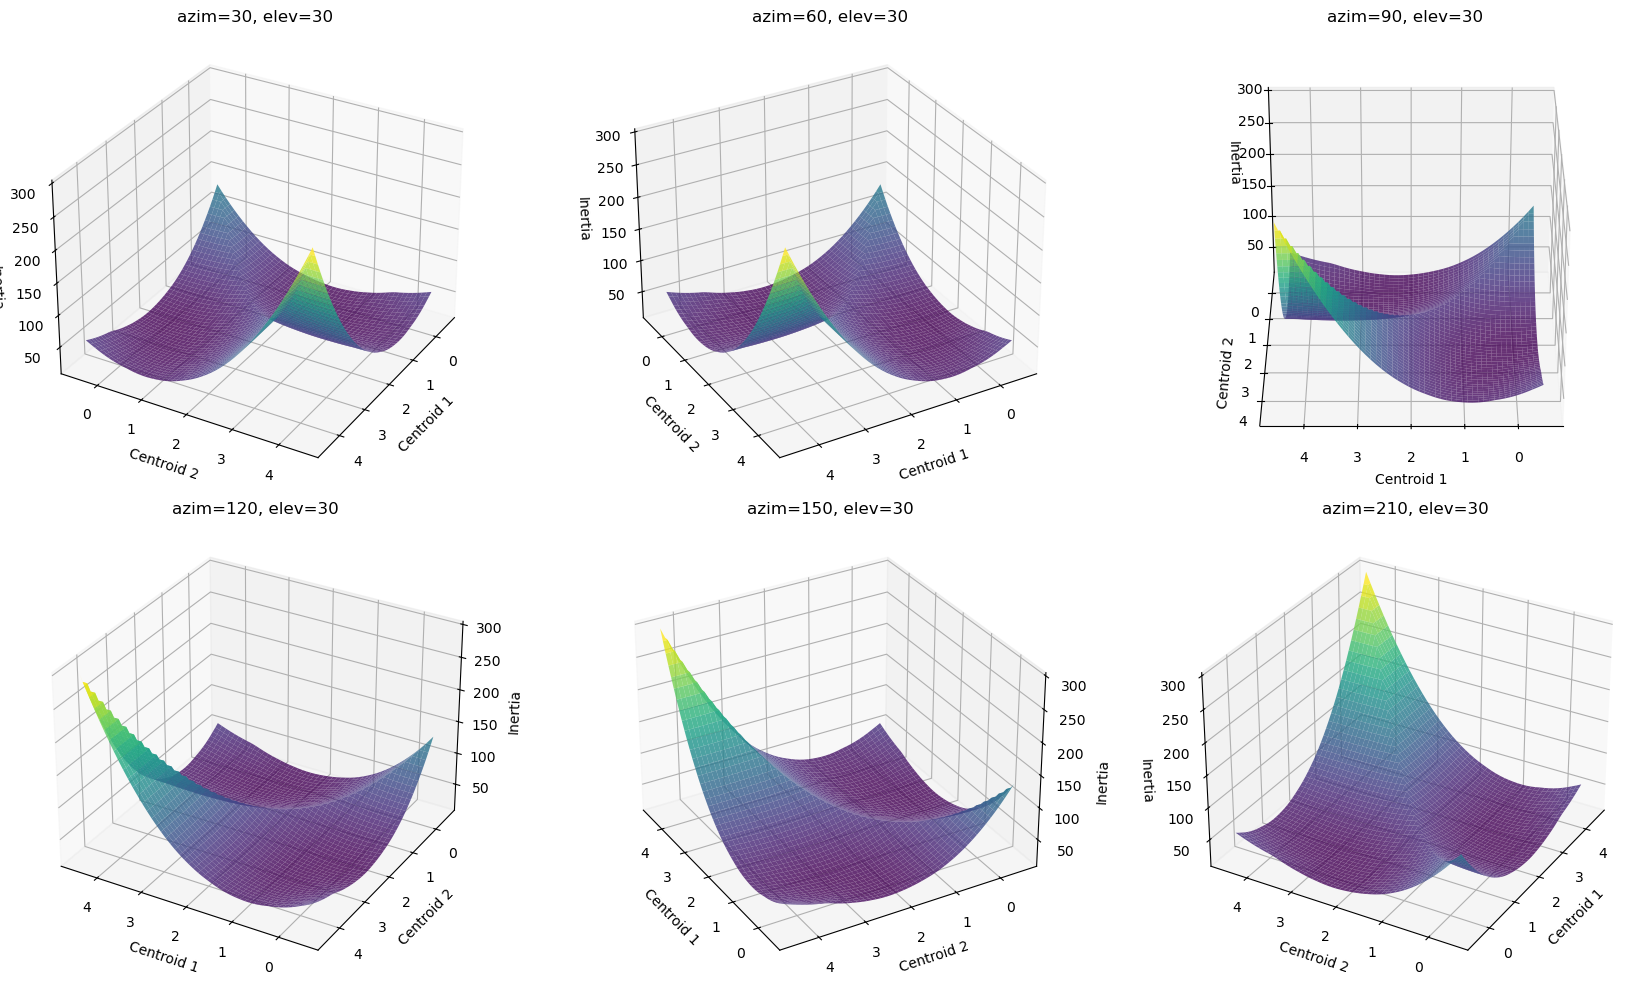

In [ ]:
fig = plt.figure(figsize=(18, 10))
view_angles = [
    (30, 30),
    (60, 30),
    (90, 30),
    (120, 30),
    (150, 30),
    (210, 30)
]

for idx, (azim, elev) in enumerate(view_angles):
    ax = fig.add_subplot(2, 3, idx + 1, projection='3d')
    surf = ax.plot_surface(C1, C2, inertia_vals, cmap='viridis', alpha=0.8)
    ax.set_xlabel('Centroid 1')
    ax.set_ylabel('Centroid 2')
    ax.set_zlabel('Inertia')
    ax.set_title(f'azim={azim}, elev={elev}')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()